# import libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [159]:
# upload API jason file
#from google.colab import files
#files.upload()


In [160]:
# set APi file location temporary
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


The syntax of the command is incorrect.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [161]:
# download data set
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

# unzip data set
!unzip stroke-prediction-dataset.zip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [162]:
# read data
stroke_dataframe = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Exploration (EDA)

In [163]:
stroke_dataframe.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [164]:
stroke_dataframe.shape

(5110, 12)

In [165]:
stroke_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [166]:
stroke_dataframe.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [167]:
stroke_dataframe.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [168]:
stroke_dataframe.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [169]:
stroke_dataframe.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [170]:
stroke_dataframe.columns.to_list()

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [171]:
stroke_dataframe.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status   stroke
72940  Female  2.0   0             0              No            children   Urban           102.92             17.6  Unknown          0         1
77     Female  13.0  0             0              No            children   Rural           85.81              18.6  Unknown          0         1
84     Male    55.0  0             0              Yes           Private    Urban           89.17              31.5  never smoked     0         1
91     Female  42.0  0             0              No            Private    Urban           98.53              18.5  never smoked     0         1
99     Female  31.0  0             0              No            Private    Urban           108.89             52.3  Unknown          0         1
                                                                                                                                       

In [172]:
unknown_smoking_count=stroke_dataframe[stroke_dataframe['smoking_status'] == 'Unknown'].shape[0]
print(f"The word 'Unknown' appears {unknown_smoking_count} times in the 'smoking_status' column.")

The word 'Unknown' appears 1544 times in the 'smoking_status' column.


In [173]:
for i in stroke_dataframe.select_dtypes(include=['object']).columns:
    print(f"{i}:\n{stroke_dataframe[i].value_counts()}\n")

gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64



In [174]:
stroke_dataframe.drop('id', axis=1, inplace=True)

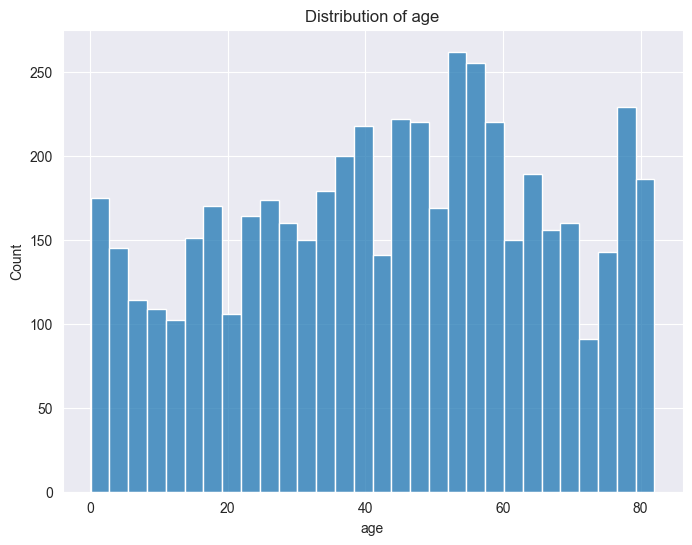

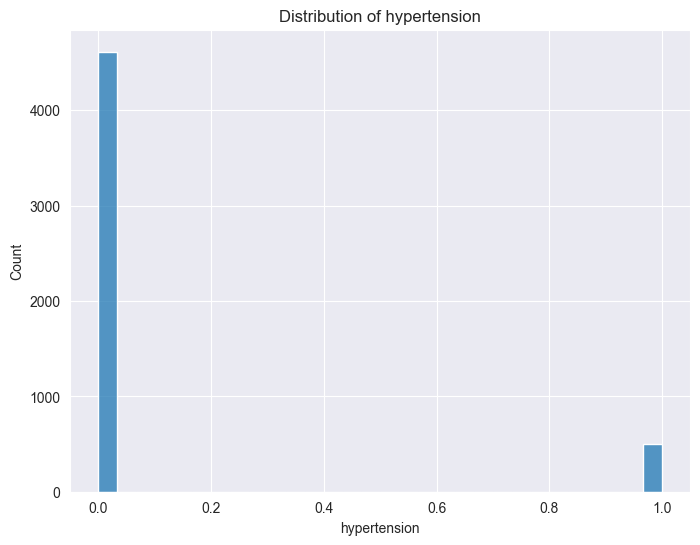

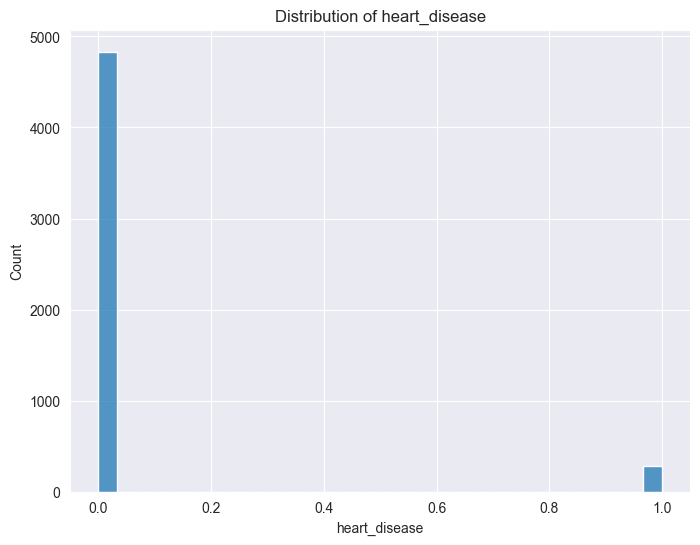

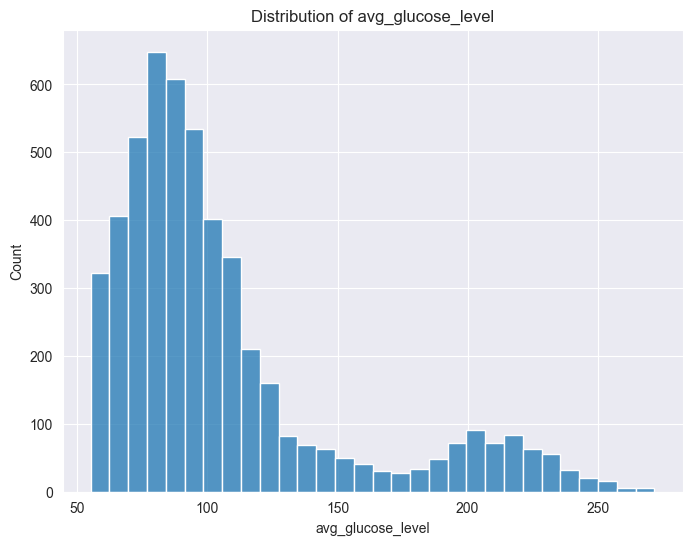

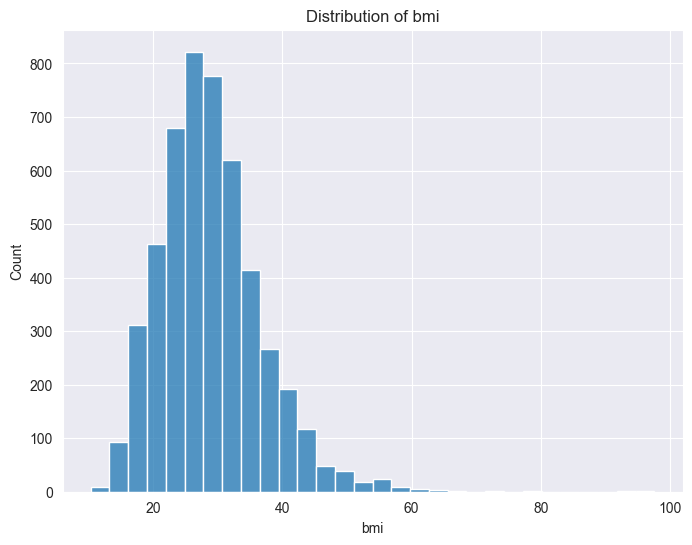

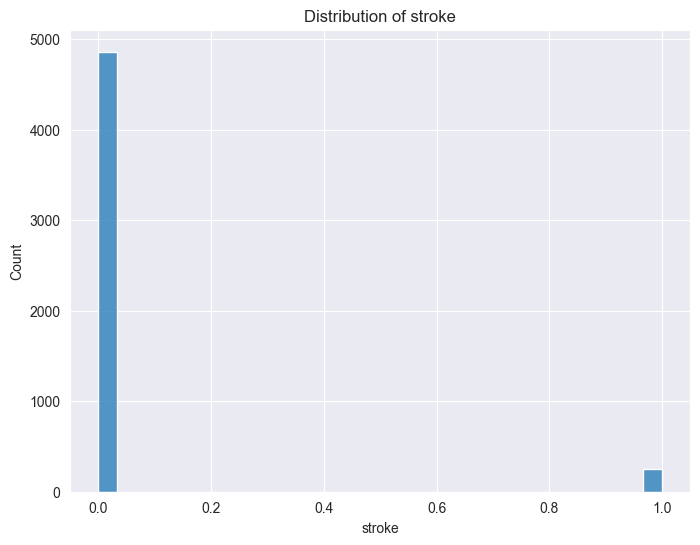

In [175]:
for col in stroke_dataframe.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(x=col, data=stroke_dataframe, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [176]:
stroke_dataframe.duplicated().sum()

np.int64(0)

In [177]:
#check for missing values

stroke_dataframe.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [178]:
#filling the missing values of the data

stroke_dataframe['bmi'].fillna(stroke_dataframe['bmi'].mean(), inplace=True)

C:\Users\abody\AppData\Local\Temp\ipykernel_22672\3632688124.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [179]:
stroke_dataframe.replace('Unknown','Passive Smoker', inplace=True)

In [180]:
stroke_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


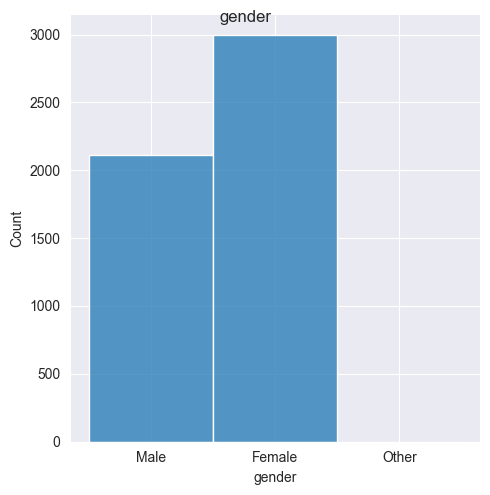

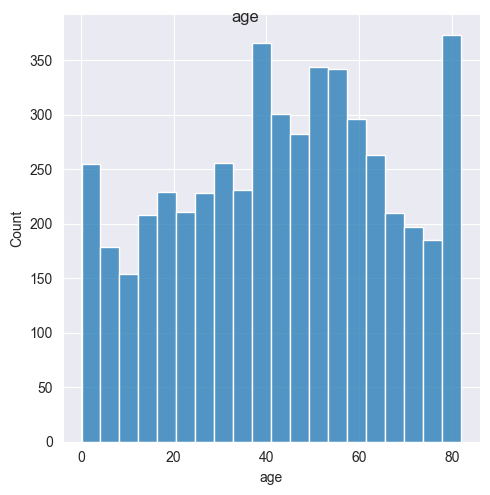

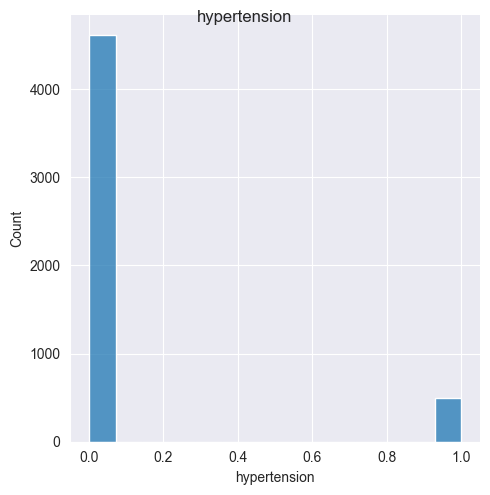

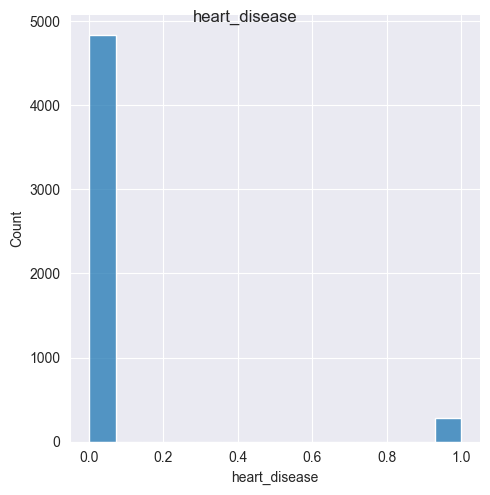

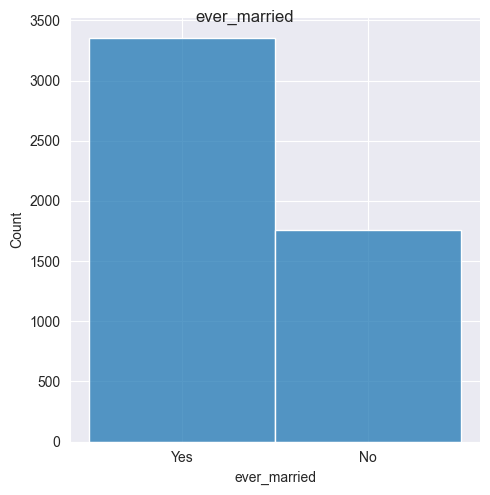

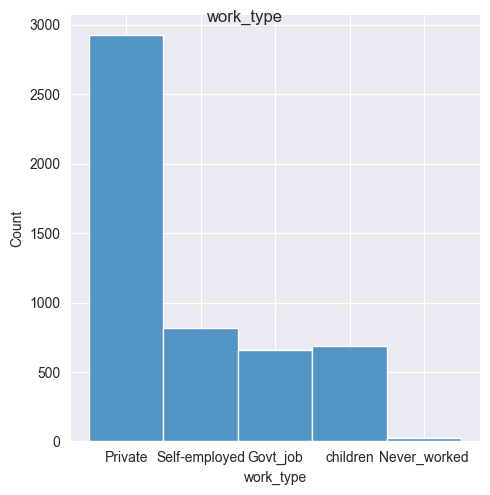

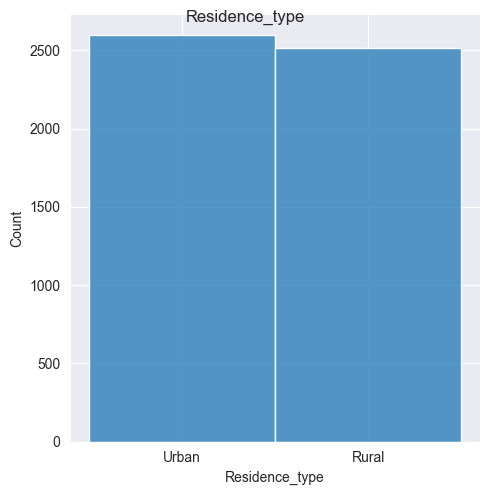

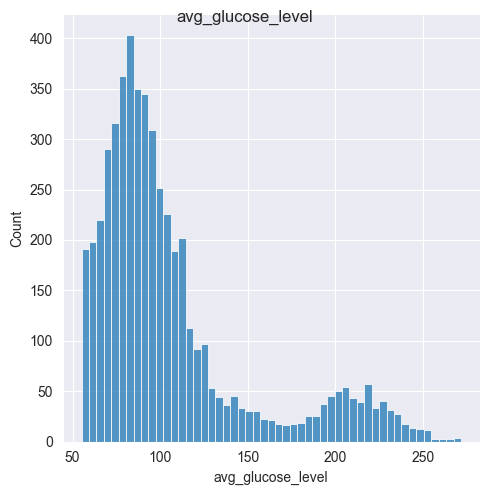

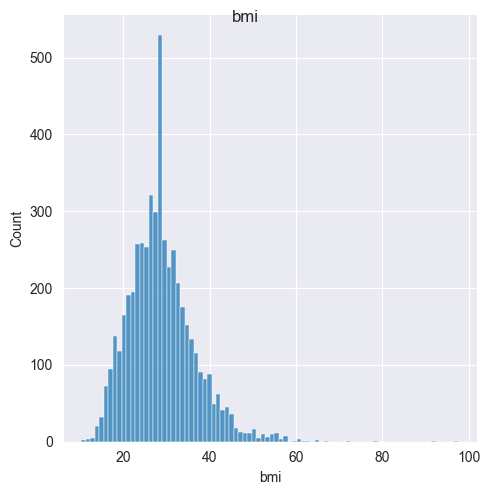

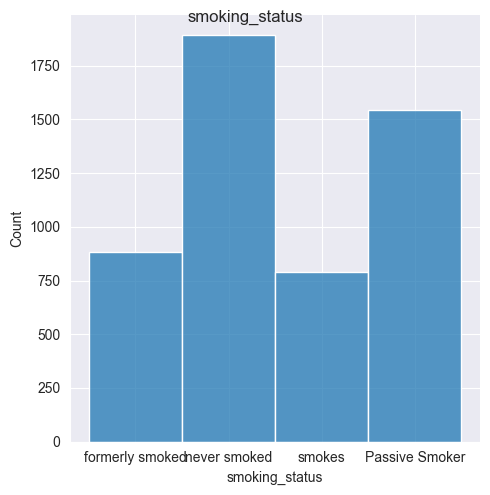

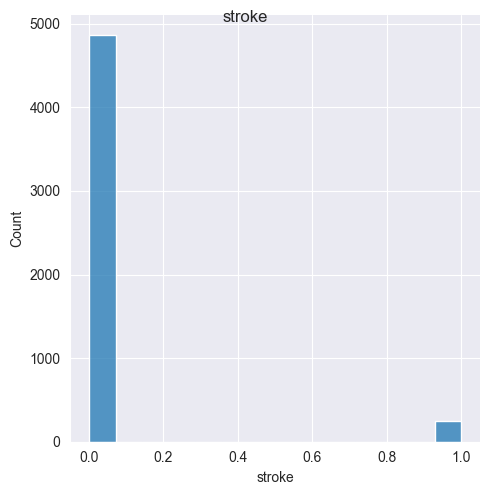

In [181]:
for i in stroke_dataframe.columns:
  plot=sns.displot(stroke_dataframe[i])
  plot.fig.suptitle(i)
  plt.show()

In [182]:
stroke_dataframe['gender'] = stroke_dataframe['gender'].replace('Other','Male')

#check outliers



In [183]:
numeric_cols = stroke_dataframe.select_dtypes(include='number').columns
object_cols = stroke_dataframe.select_dtypes(include='object').columns
binary_cols = [col for col in stroke_dataframe.columns if stroke_dataframe[col].nunique()==2]
categorical_cols = [col for col in object_cols if col not in binary_cols]
numerical_cols = [col for col in numeric_cols if col not in binary_cols]


for col in numerical_cols:
    Q1 = stroke_dataframe[col].quantile(0.25)
    Q3 = stroke_dataframe[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier condition
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers
    outliers = stroke_dataframe[(stroke_dataframe[col] < lower_bound) | (stroke_dataframe[col] > upper_bound)]

    # Print result
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print(40*"-")


Column: age
Number of outliers: 0
----------------------------------------
Column: avg_glucose_level
Number of outliers: 627
----------------------------------------
Column: bmi
Number of outliers: 126
----------------------------------------


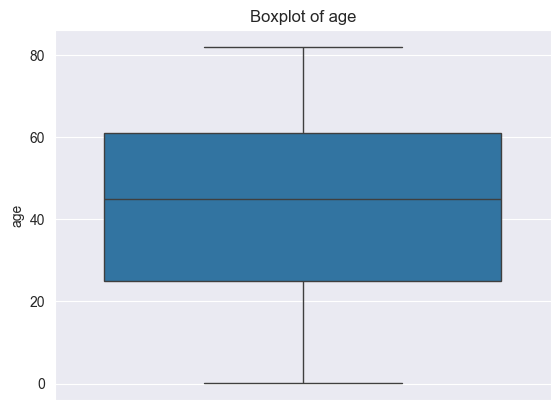

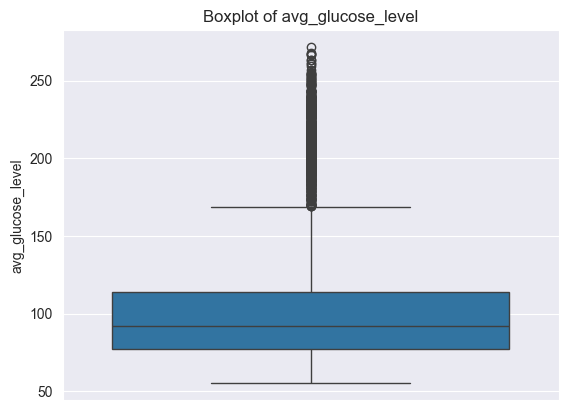

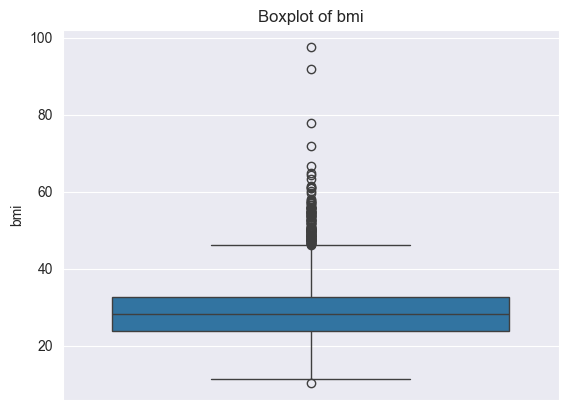

In [184]:
for col in numerical_cols:
  sns.boxplot(stroke_dataframe[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [185]:
def remove_outliers_iqr(stroke_dataframe, column):
    Q1 = stroke_dataframe[column].quantile(0.25)
    Q3 = stroke_dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return stroke_dataframe[(stroke_dataframe[column] >= lower_bound) & (stroke_dataframe[column] <=upper_bound)]

for i in numerical_cols:
    stroke_dataframe = remove_outliers_iqr(stroke_dataframe, i)

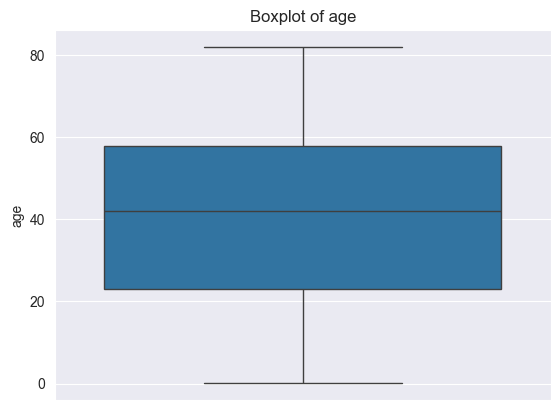

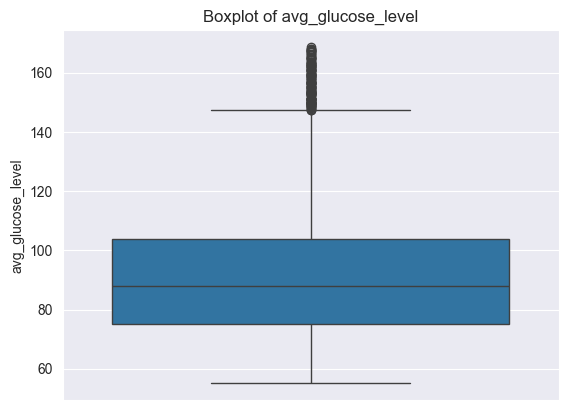

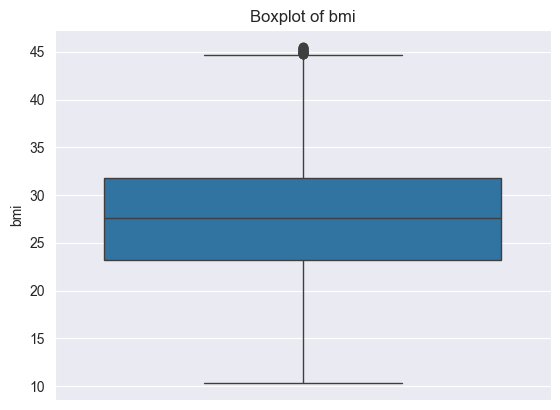

In [186]:
for col in numerical_cols:
  sns.boxplot(stroke_dataframe[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

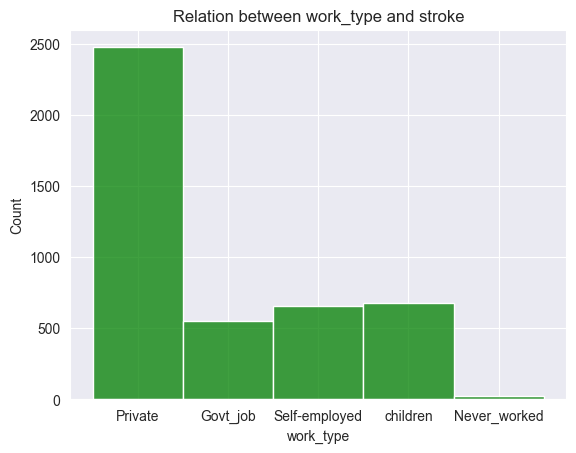

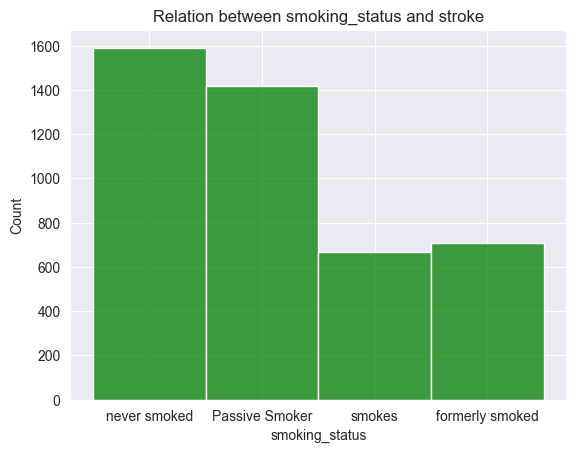

In [187]:
for i in categorical_cols:
  sns.histplot(stroke_dataframe,x=i,bins=40,color='green')
  plt.title(f'Relation between {i} and stroke')
  plt.show()

<Axes: xlabel='smoking_status', ylabel='count'>

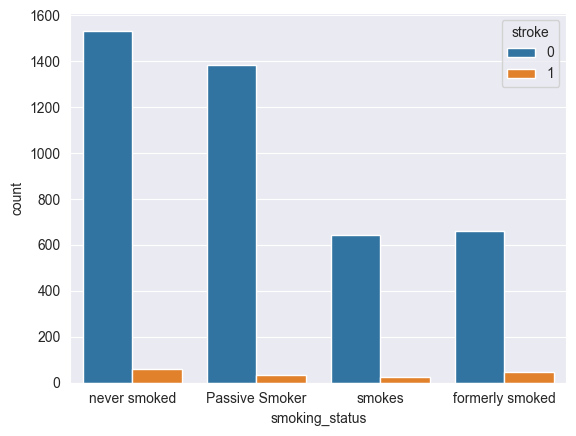

In [188]:
sns.countplot(data = stroke_dataframe, x = 'smoking_status',hue = 'stroke')

In [189]:
'''testn_columns=numeric_cols
testn_columns=categorical_cols

from sklearn.preprocessing import OneHotEncoder
le=OneHotEncoder
for i in testn_columns:
  stroke_dataframe[i]=le.fit_transform(stroke_dataframe[i])'''


'testn_columns=numeric_cols\ntestn_columns=categorical_cols\n\nfrom sklearn.preprocessing import OneHotEncoder\nle=OneHotEncoder\nfor i in testn_columns:\n  stroke_dataframe[i]=le.fit_transform(stroke_dataframe[i])'

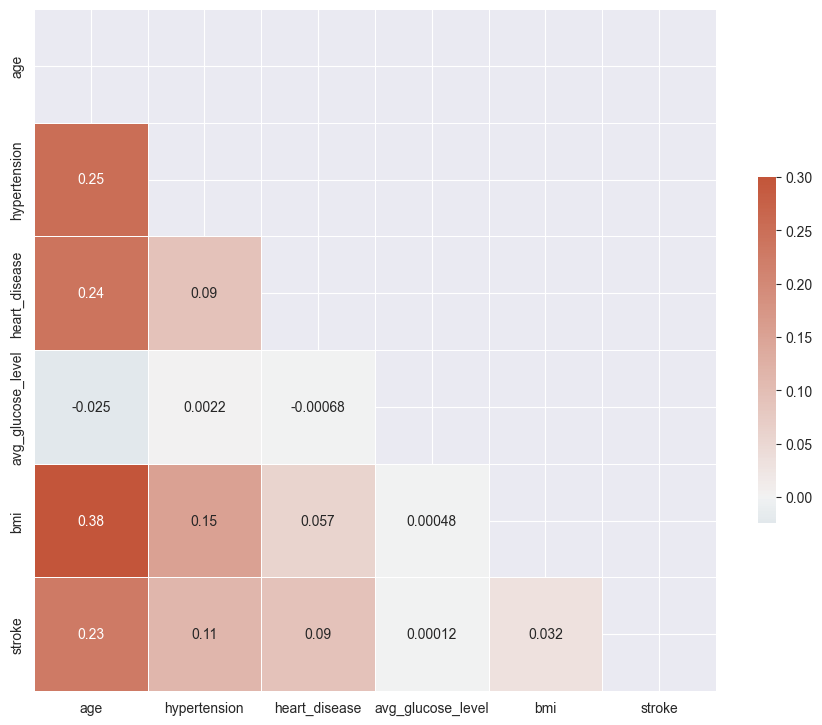

In [190]:
# Select numerical columns
numerical_df = stroke_dataframe.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr = numerical_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True)

plt.show()

In [191]:
stroke_dataframe.shape

(4383, 11)

<Axes: xlabel='age', ylabel='stroke'>

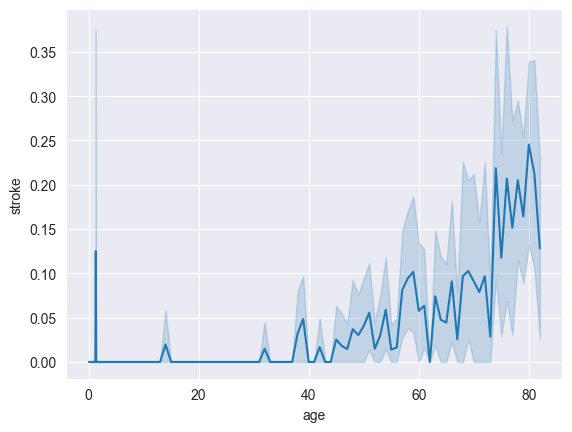

In [192]:
sns.lineplot(stroke_dataframe,x='age',y='stroke')

<Axes: xlabel='hypertension', ylabel='stroke'>

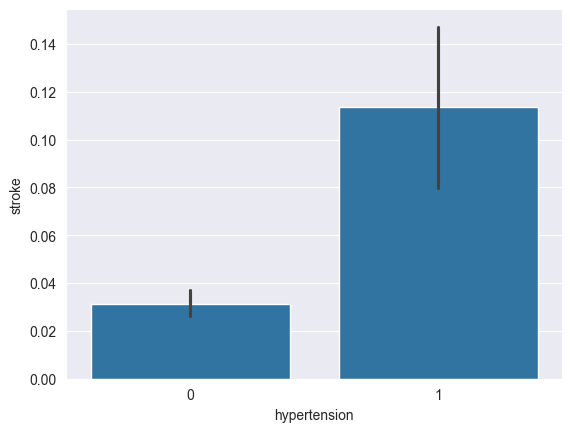

In [193]:
sns.barplot(stroke_dataframe,x='hypertension',y='stroke')

<Axes: xlabel='age', ylabel='bmi'>

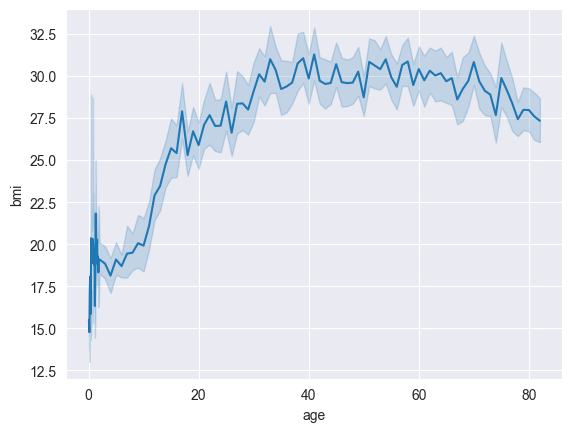

In [194]:
sns.lineplot(stroke_dataframe,x='age',y='bmi')

<Axes: xlabel='gender', ylabel='count'>

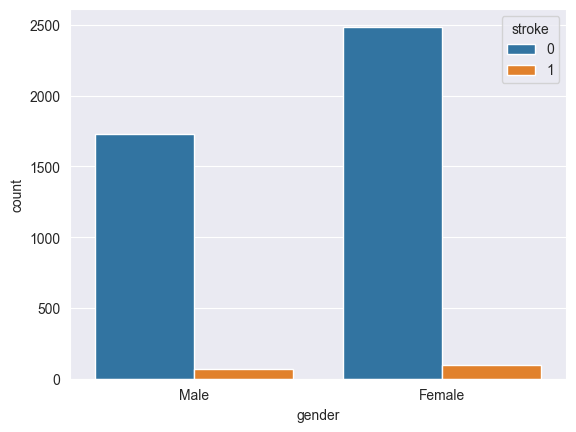

In [195]:
sns.countplot(data=stroke_dataframe,x='gender',hue='stroke')

<Axes: xlabel='heart_disease', ylabel='count'>

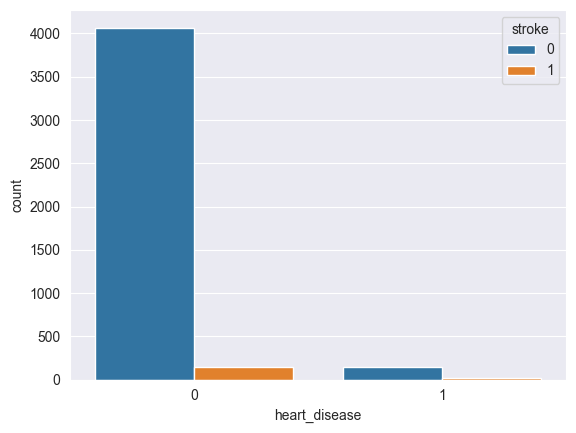

In [196]:
sns.countplot(data=stroke_dataframe,x='heart_disease',hue='stroke')

<Axes: xlabel='hypertension', ylabel='count'>

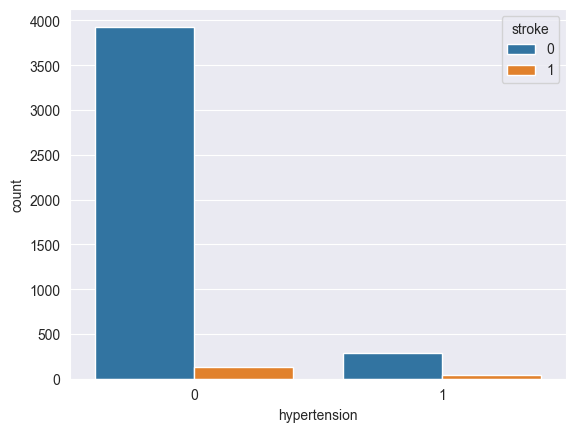

In [197]:
sns.countplot(data=stroke_dataframe,x='hypertension',hue='stroke')

<Axes: xlabel='work_type', ylabel='count'>

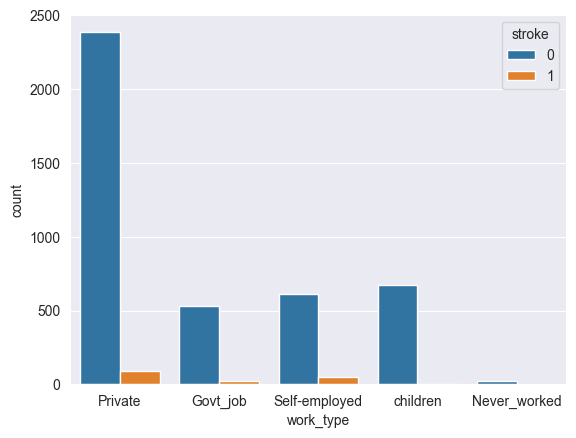

In [198]:
sns.countplot(data=stroke_dataframe,x='work_type',hue='stroke')

In [199]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
numerical_cols = stroke_dataframe.select_dtypes(include='number').columns.tolist()
categorical_cols = stroke_dataframe.select_dtypes(include=['object', 'category']).columns.tolist()
binary_cols = [col for col in stroke_dataframe.columns if stroke_dataframe[col].nunique() == 2]
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H4("Feature explorer"),
    dcc.Dropdown(
        id='feature-type-dropdown',
        options=[
            {'label': 'Numerical', 'value': 'numerical'},
            {'label': 'Categorical', 'value': 'categorical'},
            {'label': 'Binary', 'value': 'binary'}
        ],
        value='numerical',
        clearable=False
    ),
    html.Br(),
    dcc.Dropdown(id='x-axis-dropdown', placeholder="Select X feature", clearable=True),
    html.Br(),
    dcc.Dropdown(id='y-axis-dropdown', placeholder="Select Y feature (optional)", clearable=True),
    html.Br(),
    dcc.Dropdown(id='plot-type-dropdown', placeholder="Select plot type", clearable=False),
    dcc.Graph(id='feature-graph')
])
@app.callback(
    Output('x-axis-dropdown', 'options'),
    Output('y-axis-dropdown', 'options'),
    Output('plot-type-dropdown', 'options'),
    Input('feature-type-dropdown', 'value')
)
def update_feature_options(feature_type):
    if feature_type == 'numerical':
        options = [{'label': col, 'value': col} for col in numerical_cols]
        plot_options = [
            {'label': 'Box Plot', 'value': 'box'},
            {'label': 'Histogram', 'value': 'histogram'},
            {'label': 'Scatter', 'value': 'scatter'}
        ]
    elif feature_type == 'categorical':
        options = [{'label': col, 'value': col} for col in categorical_cols]
        plot_options = [
            {'label': 'Bar Chart', 'value': 'bar'},
            {'label': 'Pie Chart', 'value': 'pie'},
            {'label': 'Count Plot', 'value': 'count'}
        ]
    elif feature_type == 'binary':
        options = [{'label': col, 'value': col} for col in binary_cols]
        plot_options = [
            {'label': 'Bar Chart', 'value': 'bar'},
            {'label': 'Pie Chart', 'value': 'pie'},
            {'label': 'Count Plot', 'value': 'count'}
        ]
    else:
        options = []
        plot_options = []
    return options, options, plot_options

@app.callback(
    Output('feature-graph', 'figure'),
    Input('x-axis-dropdown', 'value'),
    Input('y-axis-dropdown', 'value'),
    Input('plot-type-dropdown', 'value')
)
def update_graph(x_axis, y_axis, plot_type):
    # default empty figure
    fig = px.scatter()  # empty placeholder

    # guard clauses
    if plot_type is None:
        return fig

    # BOX: usually requires a numeric y or numeric x depending on desired orientation.
    if plot_type == 'box':
        # if both provided, use x as category and y as numeric; if only one numeric provided, plot box of that column
        if x_axis and y_axis:
            fig = px.box(stroke_dataframe, x=x_axis, y=y_axis)
        elif x_axis and x_axis in numerical_cols:
            fig = px.box(stroke_dataframe, y=x_axis)
        else:
            fig = px.scatter()  # cannot make box plot without numeric column

    # HISTOGRAM: single numeric column
    elif plot_type == 'histogram':
        if x_axis:
            # if y provided and numeric, use it as 'color' or as facet; usually histogram uses x only
            fig = px.histogram(stroke_dataframe, x=x_axis)
        else:
            fig = px.histogram(stroke_dataframe)

    # SCATTER: needs both numeric x and numeric y
    elif plot_type == 'scatter':
        if x_axis and y_axis:
            fig = px.scatter(stroke_dataframe, x=x_axis, y=y_axis)
        else:
            fig = px.scatter()  # can't draw scatter without both axes

    # BAR: can be used for aggregations. if both provided, use x as category, y as numeric aggregation
    elif plot_type == 'bar':
        if x_axis and y_axis:
            fig = px.bar(stroke_dataframe, x=x_axis, y=y_axis)
        elif x_axis:
            # counts per category
            vc = stroke_dataframe[x_axis].value_counts().reset_index()
            vc.columns = [x_axis, 'count']
            fig = px.bar(vc, x=x_axis, y='count')
        else:
            fig = px.bar()

    # PIE: typically single categorical column -> counts; or names+values if both provided and y numeric
    elif plot_type == 'pie':
        if x_axis and y_axis and y_axis in numerical_cols:
            fig = px.pie(stroke_dataframe, names=x_axis, values=y_axis)
        elif x_axis:
            vc = stroke_dataframe[x_axis].value_counts().reset_index()
            vc.columns = ['names', 'values']
            fig = px.pie(vc, names='names', values='values')
        else:
            fig = px.pie()

    # COUNT: show counts of x, optionally colored by y (use histogram)
    elif plot_type == 'count':
        if x_axis and y_axis:
            fig = px.histogram(stroke_dataframe, x=x_axis, color=y_axis)
            fig.update_layout(barmode='overlay')
        elif x_axis:
            fig = px.histogram(stroke_dataframe, x=x_axis)
        else:
            fig = px.histogram(stroke_dataframe)

    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8050)

In [200]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    stroke_dataframe[col] = le.fit_transform(stroke_dataframe[col])
    print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Female': np.int64(0), 'Male': np.int64(1)}
{'No': np.int64(0), 'Yes': np.int64(1)}
{'Govt_job': np.int64(0), 'Never_worked': np.int64(1), 'Private': np.int64(2), 'Self-employed': np.int64(3), 'children': np.int64(4)}
{'Rural': np.int64(0), 'Urban': np.int64(1)}
{'Passive Smoker': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}


In [201]:
stroke_dataframe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.0,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.0,0,0,1,2,1,58.57,24.200000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [202]:
X = stroke_dataframe.drop('stroke', axis=1)
y = stroke_dataframe['stroke']

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age', 'avg_glucose_level', 'bmi']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [205]:
from sklearn.model_selection import GridSearchCV
scores = []
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]}}


      ,'xgboost': {
        'model': XGBClassifier(),
        'params': {
            'n_estimators': [4,3,7,100]}

        }

      , 'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{'max_depth':[3,4,2]}
        }
}

In [206]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4173,1,-1.568718,0,0,0,4,1,-0.980138,-1.669733,0
690,0,0.058663,0,0,1,3,1,2.140288,2.332435,2
4380,1,0.586462,0,0,1,2,1,2.197111,-0.634952,2
4292,1,0.894345,0,0,1,3,0,-0.311035,0.719394,3
2230,1,-1.436768,0,0,0,4,1,-0.084623,-1.350168,0
...,...,...,...,...,...,...,...,...,...,...
4026,0,1.026295,0,0,1,0,1,-0.677082,1.602001,1
618,1,0.410529,0,0,1,2,1,2.943300,0.780263,1
3631,0,0.938328,0,0,1,2,1,-1.530750,0.186786,2
4404,1,1.422144,0,0,1,2,1,0.444404,1.252002,2


In [207]:

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

D:\data science\project_depi\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

D:\data science\project_depi\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

D:\data science\project_depi\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

D:\data science\project_depi\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.

In [208]:
df

,model,best_score,best_params
0,random_forest,0.963167,{'n_estimators': 10}
1,logistic_regression,0.963495,{'C': 1}
2,xgboost,0.964145,{'n_estimators': 7}
3,decision_tree,0.963495,{'max_depth': 2}


In [209]:
xgb= XGBClassifier(n_estimators=7)
xgb.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [214]:
c=xgb.predict(X_test)

True


In [210]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report
y_pred=xgb.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test,y_pred)}")
print(f"Confusion matrix = {confusion_matrix(y_test,y_pred)}")
print(f"Xgb :{classification_report(y_test, y_pred)}")


Accuracy = 0.9589353612167301
Confusion matrix = [[1258    5]
 [  49    3]]
Xgb :              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1263
           1       0.38      0.06      0.10        52

    accuracy                           0.96      1315
   macro avg       0.67      0.53      0.54      1315
weighted avg       0.94      0.96      0.94      1315



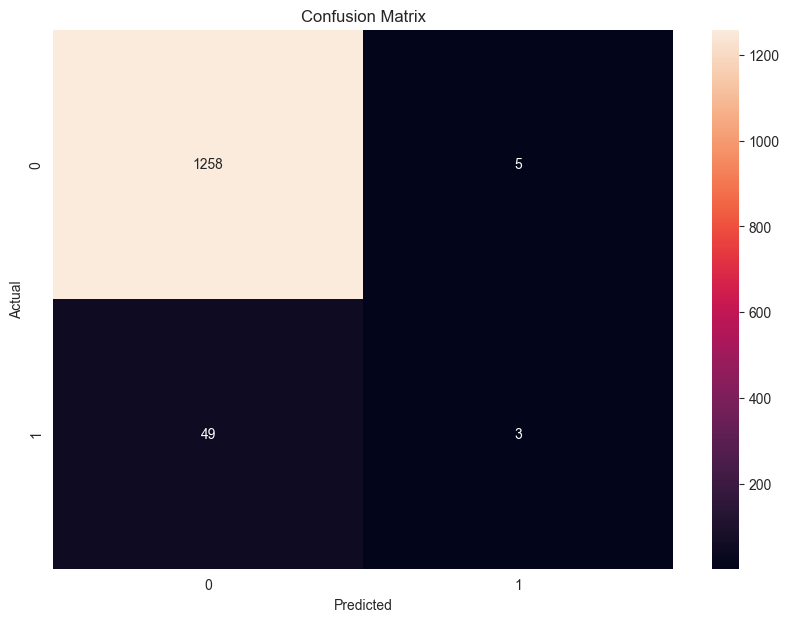

In [211]:
#visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [212]:
# save the model as a pickle file
import pickle
with open('stroke_prediction_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)
